**YOUR NAME HERE**

Spring 2023

CS 251: Data Analysis and Visualization

Project 2: Matrix Transformations

In [36]:
import numpy as np
import matplotlib.pyplot as plt

import data
import transformation

# plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
# plt.rcParams.update({'font.size': 20, 'figure.figsize': (4, 4)})


plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20, 'figure.figsize': (4, 4)}) 

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 2: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself — **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is an **overview** of Transformation class's methods in transformation.py (use tasks below to guide you through the implementation):
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints — i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Visualizing multi-dimensional data (>3D) with color scales

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

In this task, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the constructor and `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
    - To do so, go to https://jiffyclub.github.io/palettable/colorbrewer/, and examine maps in the 3 categories (diverging, qualitative, and sequential) to find the appropriate map. Access via the naming scheme below. The map has an attribute named mpl_colormap that can be passed in to `scatter` to control the colors (as the value for the cmap parameter). We use the third feature (which we are calling `Z` here) to determine which values of the color map are used for which data points. We can also control the outline of the points with the edgecolor argument (here we make it black):

```
color_map = palettable.colorbrewer.sequential.Purples_9
scatter(X, Y, c=Z, s=75, cmap=color_map.mpl_colormap, edgecolor='black')
```

- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


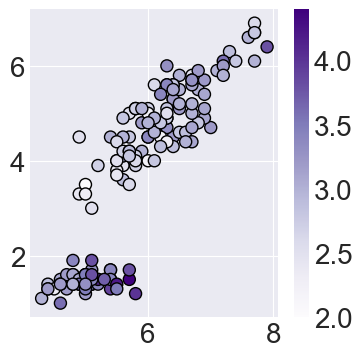

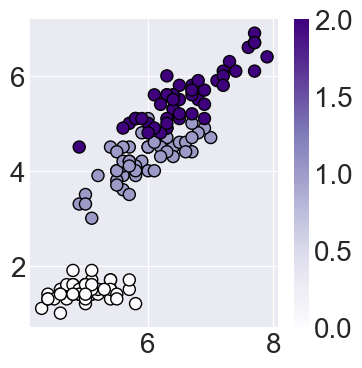

In [37]:
# Your code here
d1 = data.Data('data/iris.csv')
t = transformation.Transformation(d1)
print(d1.get_headers())


t.scatter_color('sepal_length','petal_length','sepal_width')
t.scatter_color('sepal_length','petal_length','species')



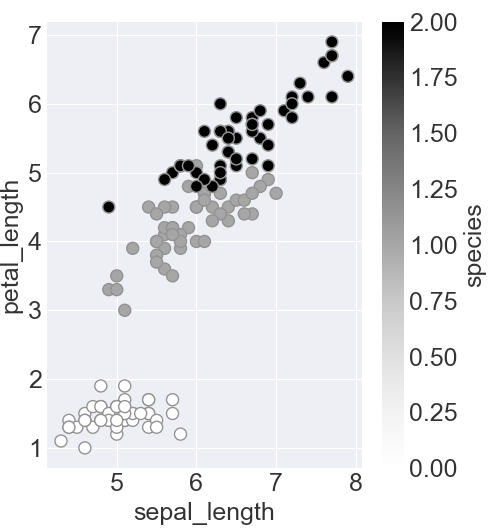

**Question 1:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

**Answer 1:** The colour is a more useful representation of a discrete feature like species, because the third feature becomes clear and the three groups are clearly separted. 

## Task 2) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- `project(headers)`: "project" the data on the list of data variables specified by `headers` — i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.

### Test (i): Translation

Write test code in the cell below that does the following. Note the below expected output.

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [38]:

# Your test code here
headers = ["sepal_length","sepal_width","petal_length"]

t.project(headers)

t.translation_matrix([-0.5,0,1.5,1])

array([[ 1. ,  0. ,  0. , -0.5],
       [ 0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  1.5],
       [ 0. ,  0. ,  0. ,  1. ]])

**Your output should look like:**

    Translation matrix:
    [[ 1.   0.   0.  -0.5]
     [ 0.   1.   0.   0. ]
     [ 0.   0.   1.   1.5]
     [ 0.   0.   0.   1. ]]

### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [39]:
# Your test code here

scale_matrix = t.scale_matrix([1,2,1/3,1])
print(scale_matrix)


[[1.      0.      0.      0.     ]
 [0.      2.      0.      0.     ]
 [0.      0.      0.33333 0.     ]
 [0.      0.      0.      1.     ]]


**Your output should look like:**

    Scale matrix:
    [[1.      0.      0.      0.     ]
     [0.      2.      0.      0.     ]
     [0.      0.      0.33333 0.     ]
     [0.      0.      0.      1.     ]]

## Task 3) Transformation Detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 3a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


(<Figure size 1200x1200 with 25 Axes>,
 array([[<AxesSubplot:ylabel='sepal_length'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='sepal_width'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='petal_length'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='petal_width'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='sepal_length', ylabel='species'>,
         <AxesSubplot:xlabel='sepal_width'>,
         <AxesSubplot:xlabel='petal_length'>,
         <AxesSubplot:xlabel='petal_width'>,
         <AxesSubplot:xlabel='species'>]], dtype=object))

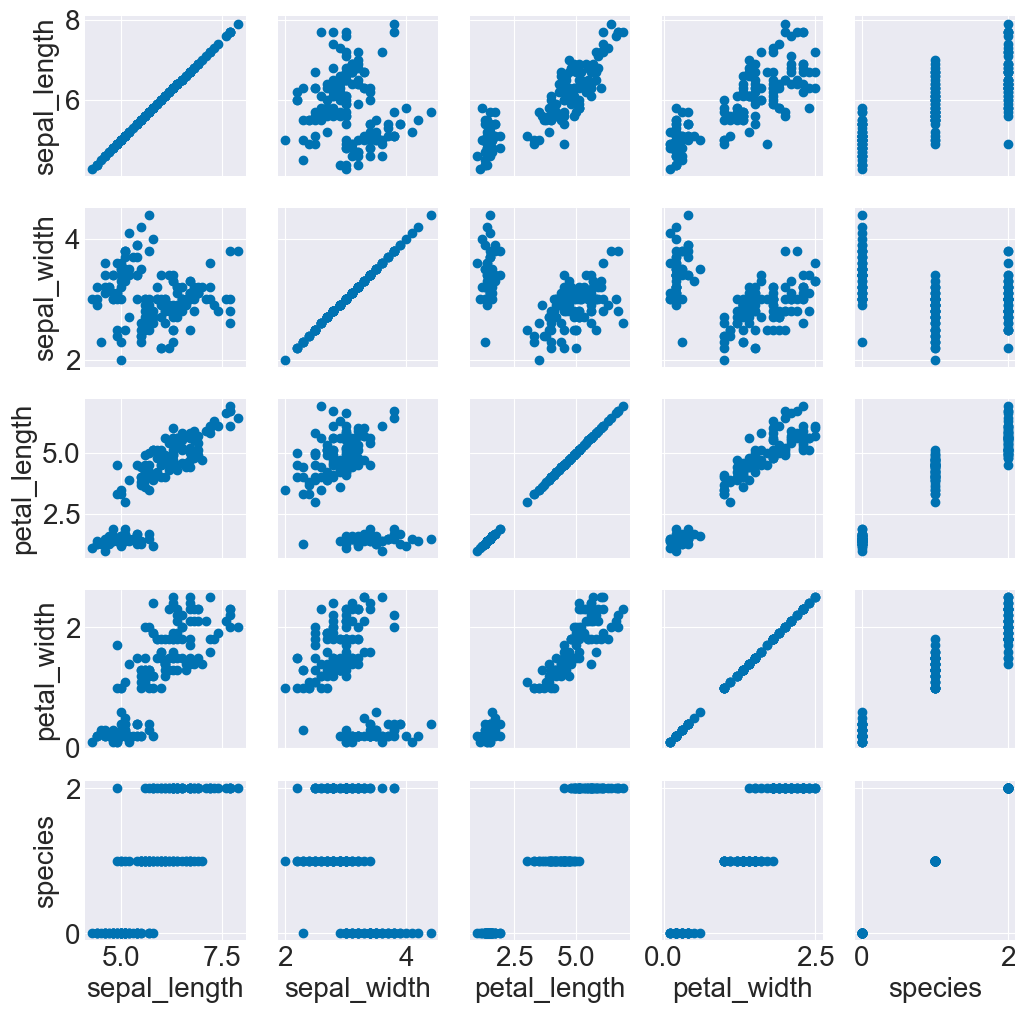

In [40]:
# Your code here

d1 = data.Data('data/iris.csv') 
t = transformation.Transformation(d1)
headers = d1.get_headers()
print(headers)
t.pair_plot(headers)

#### Your results should look like the image below.

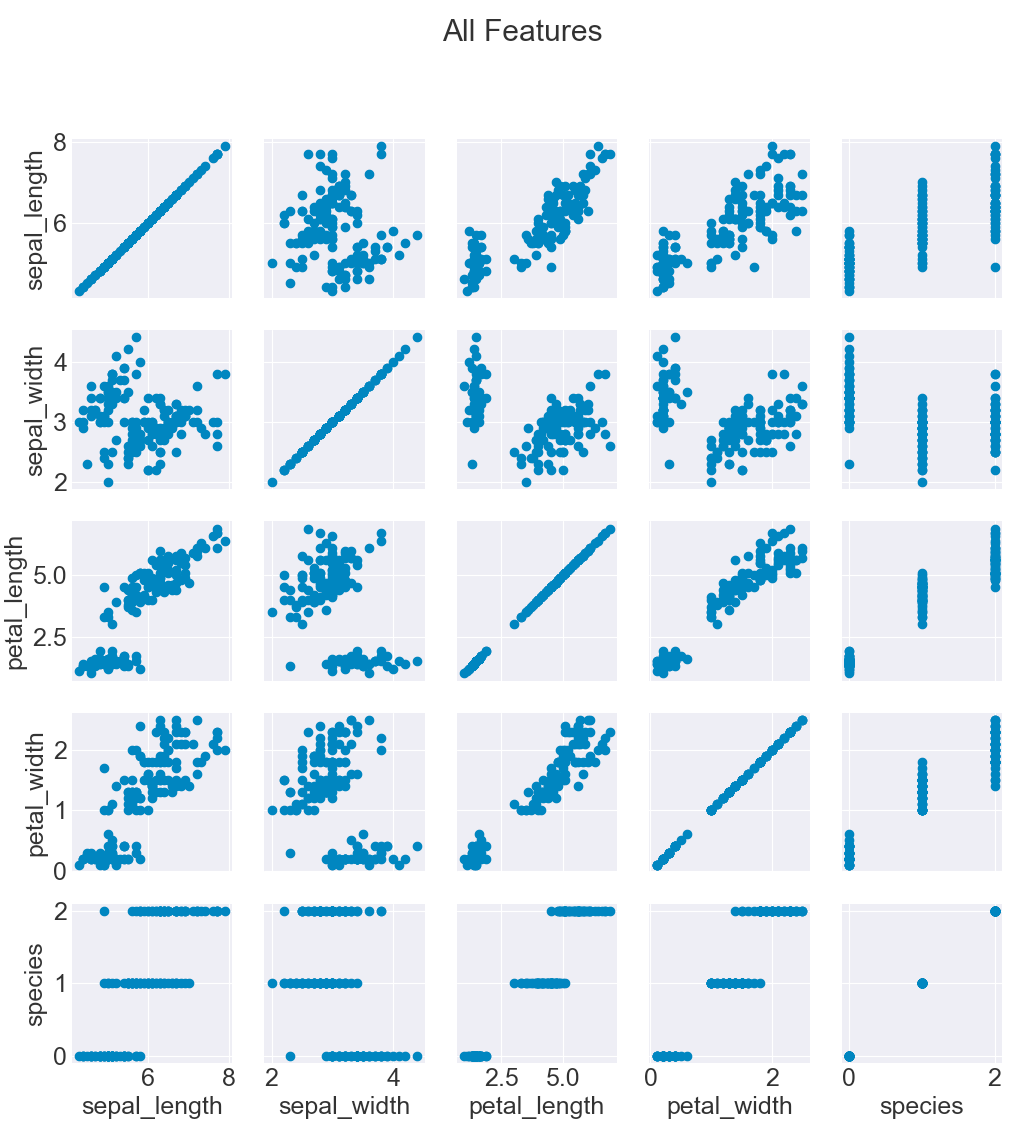

**Question 2:** How many dimensions (features) does the Iris dataset contain?

**Answer 2:** 5 Features in total

### 3b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

(<Figure size 1200x1200 with 9 Axes>,
 array([[<AxesSubplot:ylabel='sepal_length'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:ylabel='petal_length'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
         <AxesSubplot:xlabel='petal_length'>,
         <AxesSubplot:xlabel='petal_width'>]], dtype=object))

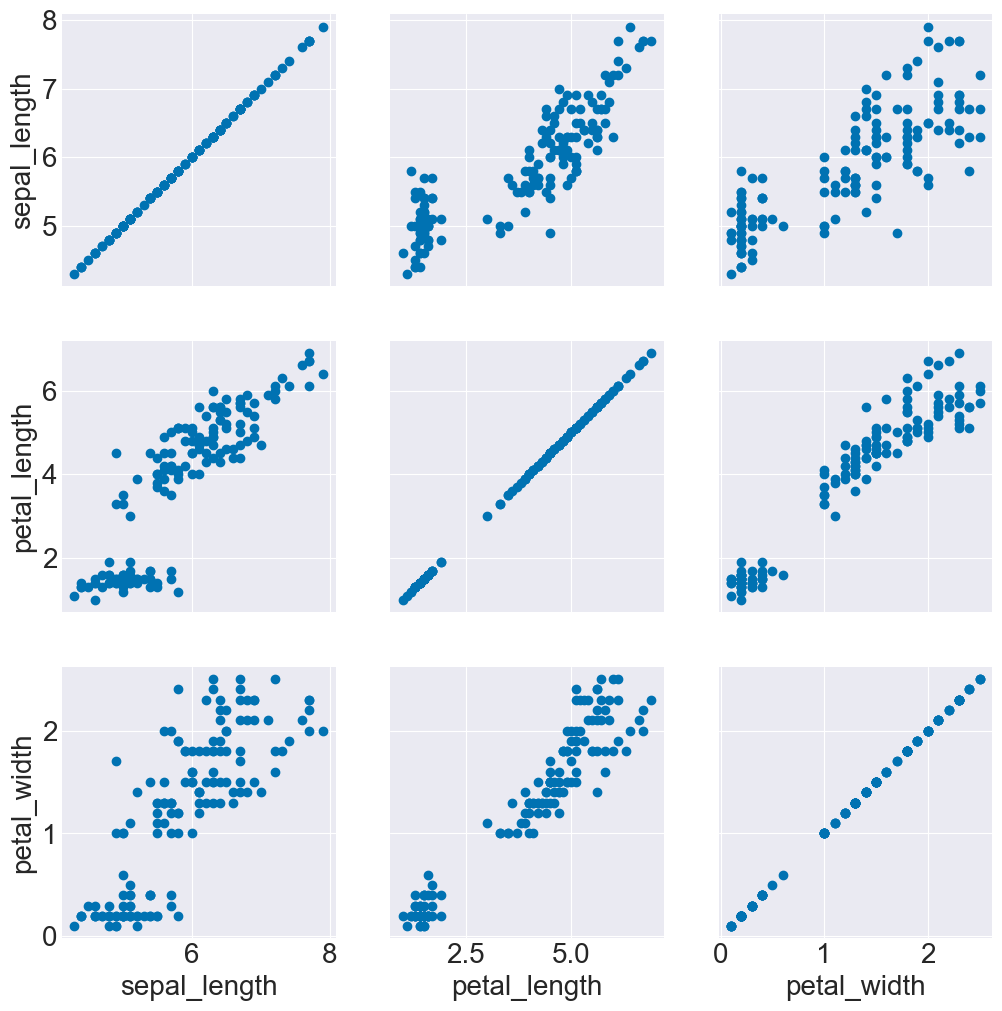

In [41]:
# Your code here

d1 = data.Data('data/iris.csv') 
t1 = transformation.Transformation(d1)
variables = ['sepal_length','petal_length','petal_width']
t1.project(variables)
t1.pair_plot(variables)

#### Your results should look like the image below.

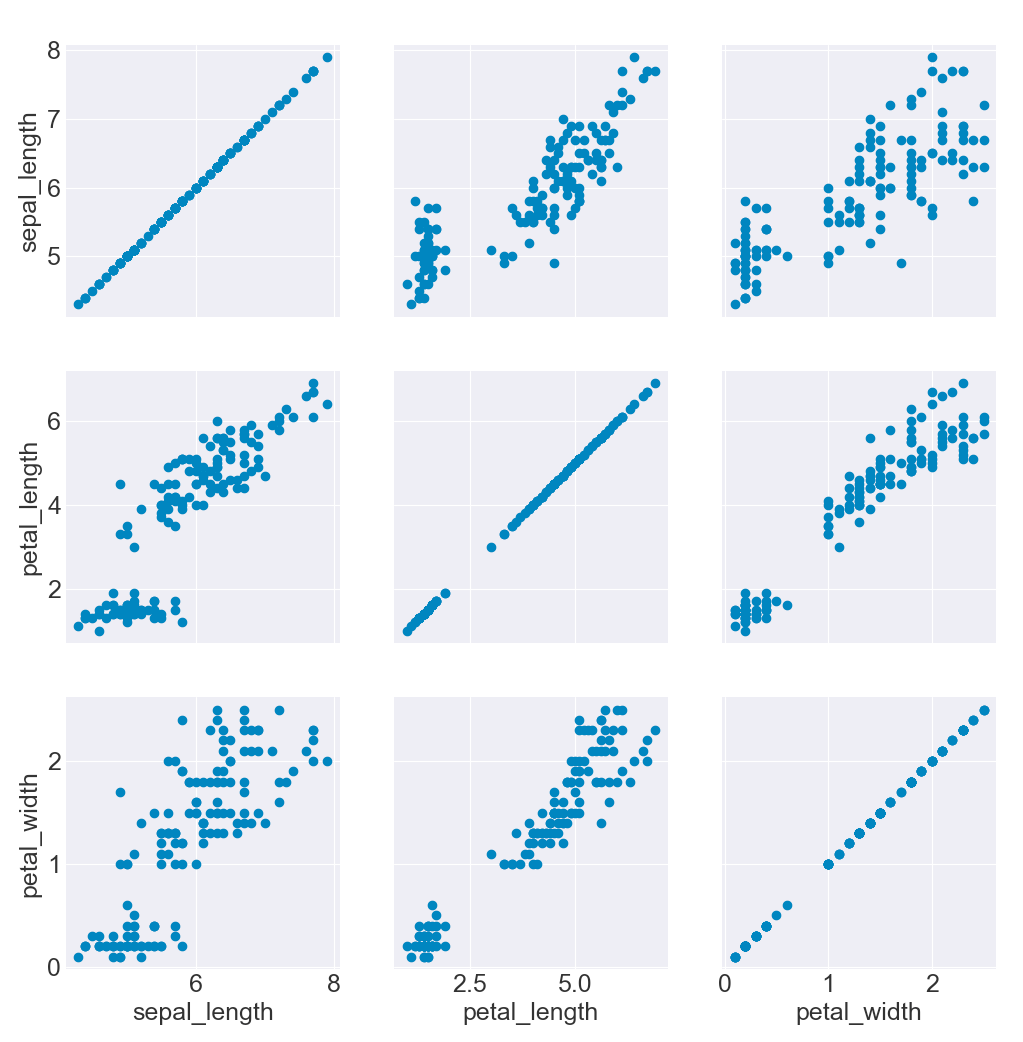

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 3:** By using projection and looking at the previous pairplot.

### 3c) Implement methods that apply a single transformation

It can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [42]:
# Your test code here

variables = ['sepal_length','sepal_width','petal_length']
t1.project(variables)
d = t1.translate([1,1,1,1])
print(d[:5,:])

[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


**Your translate output should look like:**

    [[6.1 4.5 2.4]
     [5.9 4.  2.4]
     [5.7 4.2 2.3]
     [5.6 4.1 2.5]
     [6.  4.6 2.4]]

#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [43]:
# Your test code here

headers = ['sepal_length', 'sepal_width', 'petal_length']
t1.project(headers)


matrix = [1/2,1/2,1/2,1]
answer = t1.scale(matrix)

print(answer[:5,:])

[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


**Your scale output should look like:**

    [[2.55 1.75 0.7 ]
     [2.45 1.5  0.7 ]
     [2.35 1.6  0.65]
     [2.3  1.55 0.75]
     [2.5  1.8  0.7 ]]

### 3d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

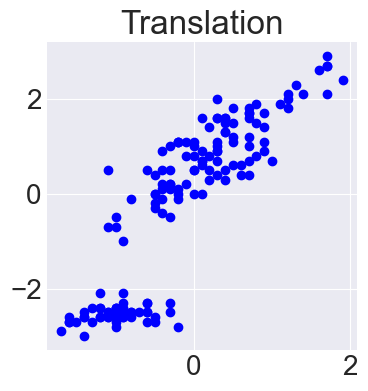

In [44]:
# Your code here

t1 = transformation.Transformation(d1)

x = 'sepal_length'
y = 'petal_length'
headers = ['sepal_length','petal_length']
t1.project(headers)

t1.translate([-6,-4,1])
x,y = t1.scatter(x,y,"Translation")


#### Your results should look like the image below.

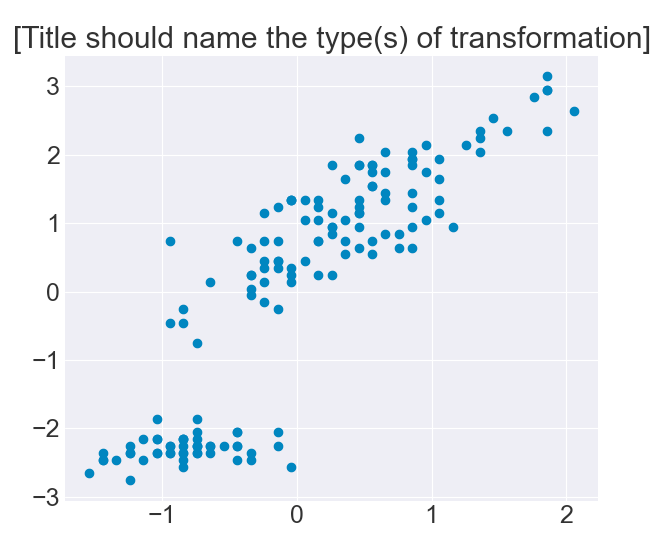

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 4:** It looked the same shape as one of the graphs on the pairplot. I took that one and translated so its numbers correspond on the y axis. 

### 3e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

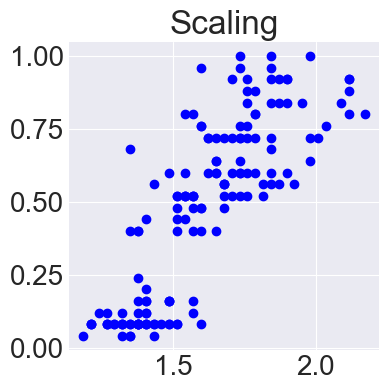

In [45]:
# Your code here

t1 = transformation.Transformation(d1)

x = 'sepal_length'
y = 'petal_width'
headers = ['sepal_length','petal_width']
t1.project(headers)

t1.scale([0.275,0.4,1])
# 8/x = 2.2, x = 0.275
#2/y = 1, y = 0.4
x,y = t1.scatter(x,y,"Scaling")

# plt.xlim([1,2.2])

#### Your results should look like the plot below.

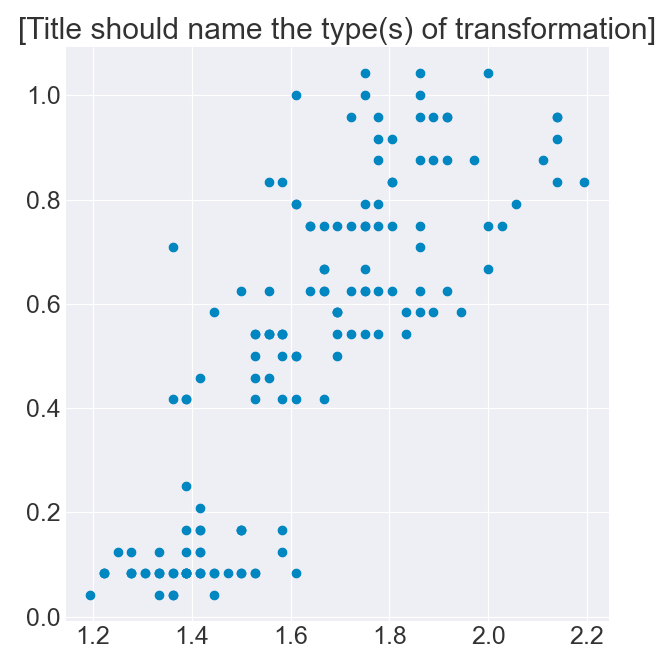

**Question 5:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 5:** because it is the same shape, but with axes scaled differently.

## Task 4) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:

1. All the variables together (entire matrix).
2. All the variables separately/independently.

### 4a) Applying compound transformations

Performing data normalization requires a sequence of matrix transformations. In cases like these, it can be convienent to create one compound transformation matrix `C` then multiply it once with the data matrix (instead of doing separate matrix multiplications for each transformation).

Before you start working on the normalization methods, implement the helper method `transform(C)` to transform the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

#### Test `transform`: Perform the compound translation-scaling transformation to the projected data

* Create a Transformation object for the Iris dataset then project onto the first 3 variables: `sepal_length`, `sepal_width`, and `petal_length`.
* Create **and print** a compound transformation matrix `C` in the cell below from translation and scaling matrices that perform the following operations. Remember that order matters when building your compound transformation matrix and the data matrix will ultimately go on the right-hand side.
    - Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`. 
    - Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`.
- Use the `transform` method to apply it to the projected data. **Print the 1st 5 samples.**

In [46]:
# Your test code here

t1.project(['sepal_length',"sepal_width",'petal_length'])
S = t1.scale_matrix([1,2,1/3,1])
T = t1.translation_matrix([-0.5,0,0.5,1])
C = T@S
print("Compound transformation matrix:")
print(C)

print("Transformed data:")
print(t1.transform(C)[:5,:])

Compound transformation matrix:
[[ 1.       0.       0.      -0.5    ]
 [ 0.       2.       0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]]
Transformed data:
[[4.6     7.      0.96667]
 [4.4     6.      0.96667]
 [4.2     6.4     0.93333]
 [4.1     6.2     1.     ]
 [4.5     7.2     0.96667]]


**Your output should look like:**


    Compound transformation matrix:
    [[ 1.       0.       0.      -0.5    ]
     [ 0.       2.       0.       0.     ]
     [ 0.       0.       0.33333  0.5    ]
     [ 0.       0.       0.       1.     ]]

    Transformed data:
    [[4.6     7.      0.96667]
     [4.4     6.      0.96667]
     [4.2     6.4     0.93333]
     [4.1     6.2     1.     ]
     [4.5     7.2     0.96667]]

### 4b) Normalize together

Implement `normalize_together` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

(<Figure size 1200x1200 with 25 Axes>,
 array([[<AxesSubplot:ylabel='sepal_length'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='sepal_width'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='petal_length'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='petal_width'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='sepal_length', ylabel='species'>,
         <AxesSubplot:xlabel='sepal_width'>,
         <AxesSubplot:xlabel='petal_length'>,
         <AxesSubplot:xlabel='petal_width'>,
         <AxesSubplot:xlabel='species'>]], dtype=object))

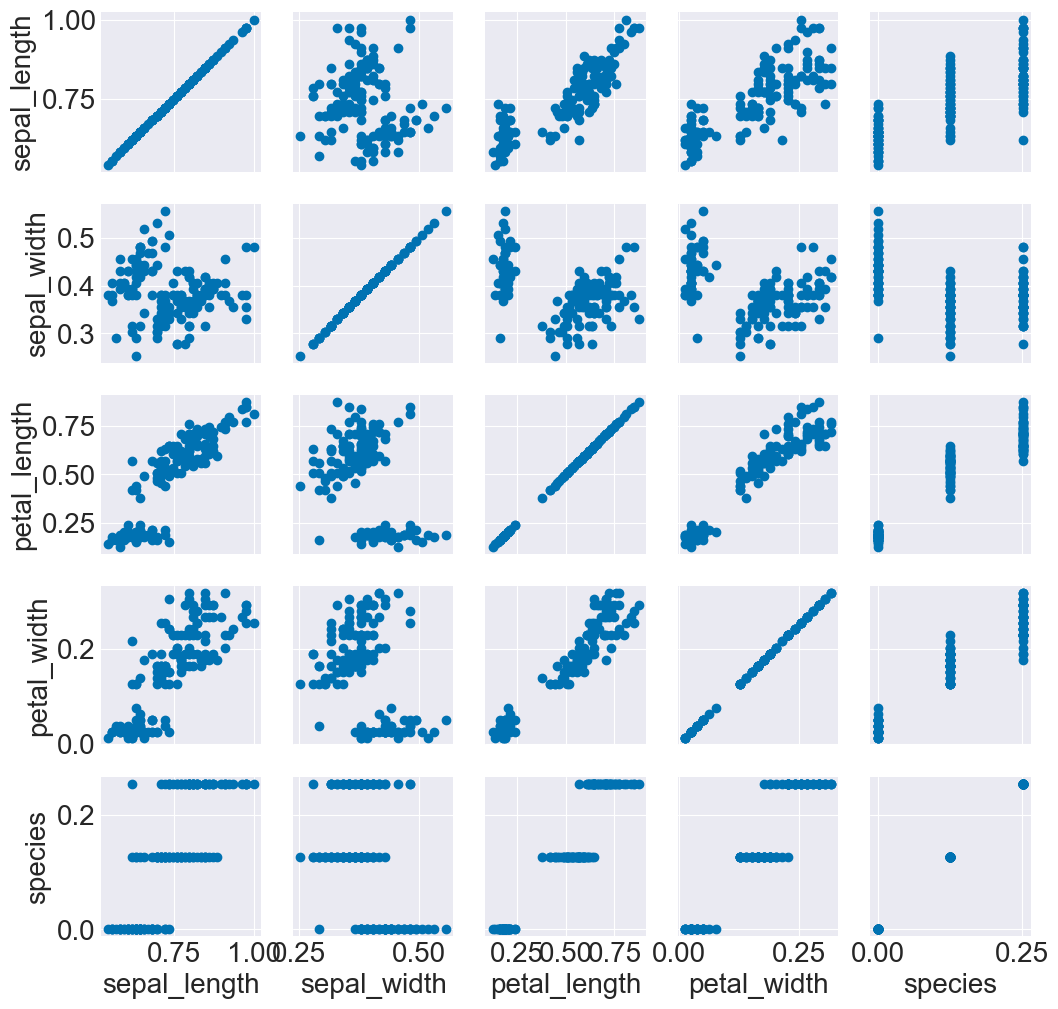

In [47]:
# Your test code here

t1 = transformation.Transformation(d1)
headers = d1.get_headers()
t1.project(headers)

t1.normalize_together()
t1.pair_plot(headers)


# Fix later the labels

#### Your results should look like the image below.

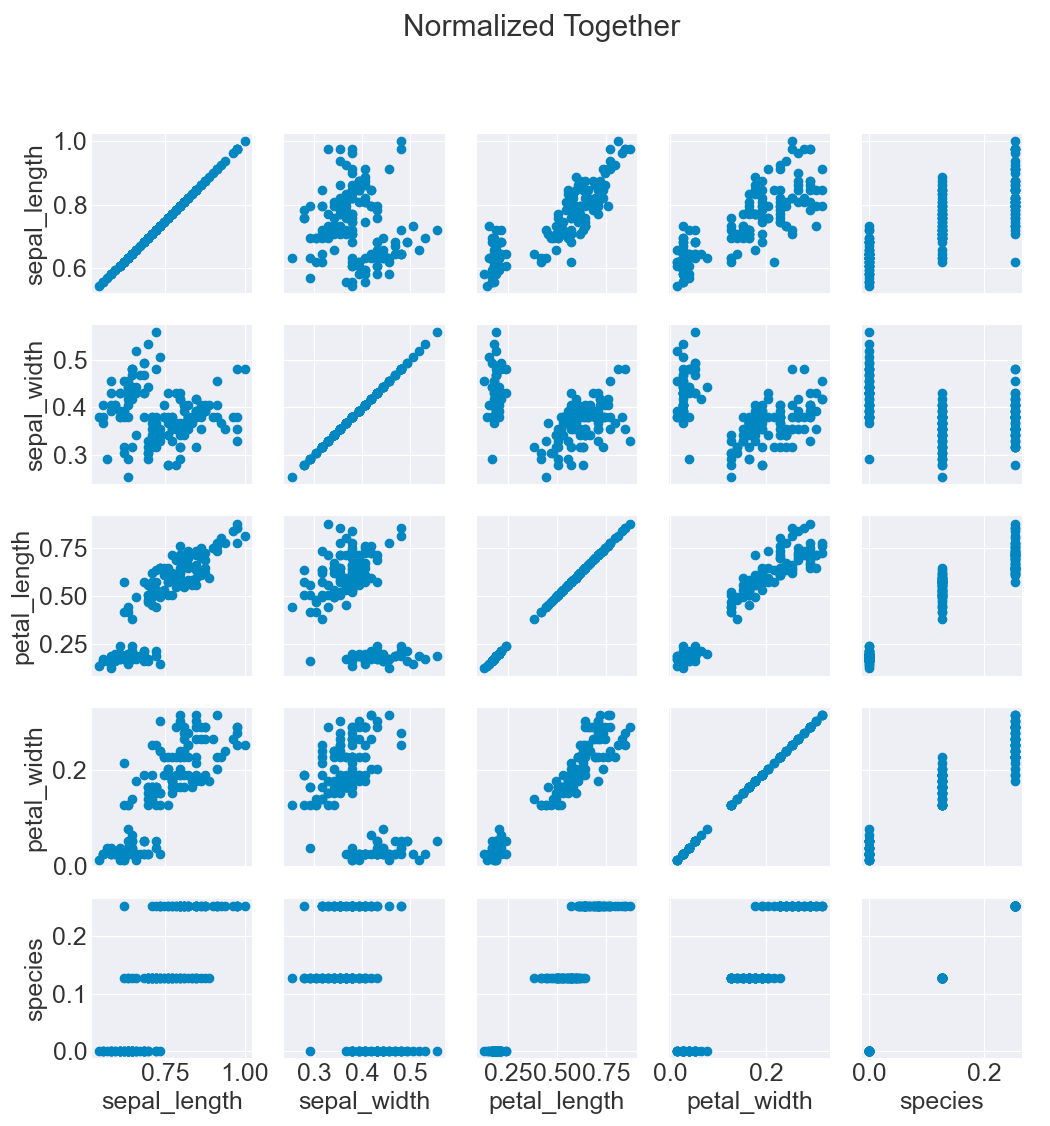

### 4c) Normalize Separately

Implement `normalize_separately` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

(<Figure size 1200x1200 with 25 Axes>,
 array([[<AxesSubplot:ylabel='sepal_length'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='sepal_width'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='petal_length'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='petal_width'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='sepal_length', ylabel='species'>,
         <AxesSubplot:xlabel='sepal_width'>,
         <AxesSubplot:xlabel='petal_length'>,
         <AxesSubplot:xlabel='petal_width'>,
         <AxesSubplot:xlabel='species'>]], dtype=object))

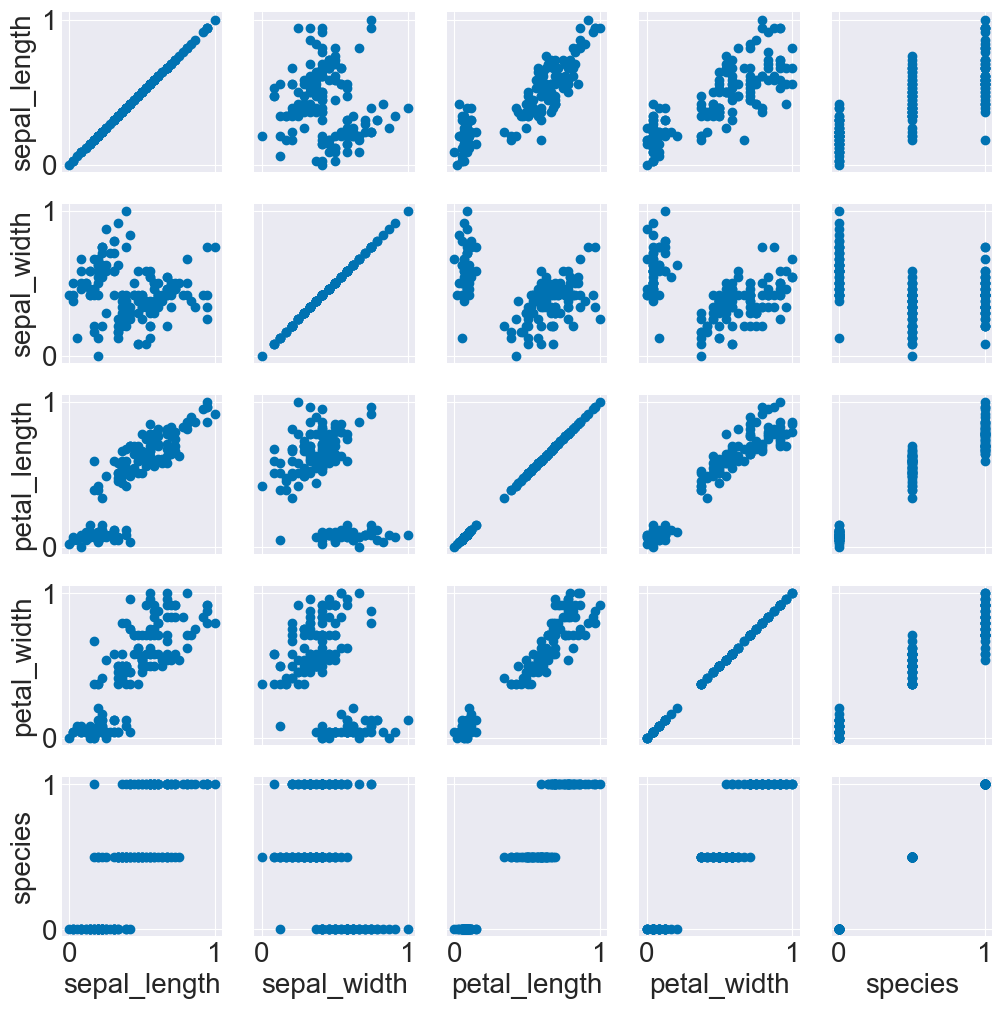

In [48]:
# Your test code here

t1 = transformation.Transformation(d1)
headers = d1.get_headers()
t1.project(headers)

t1.normalize_separately()
t1.pair_plot(headers)

#### Your results should look like the image below.

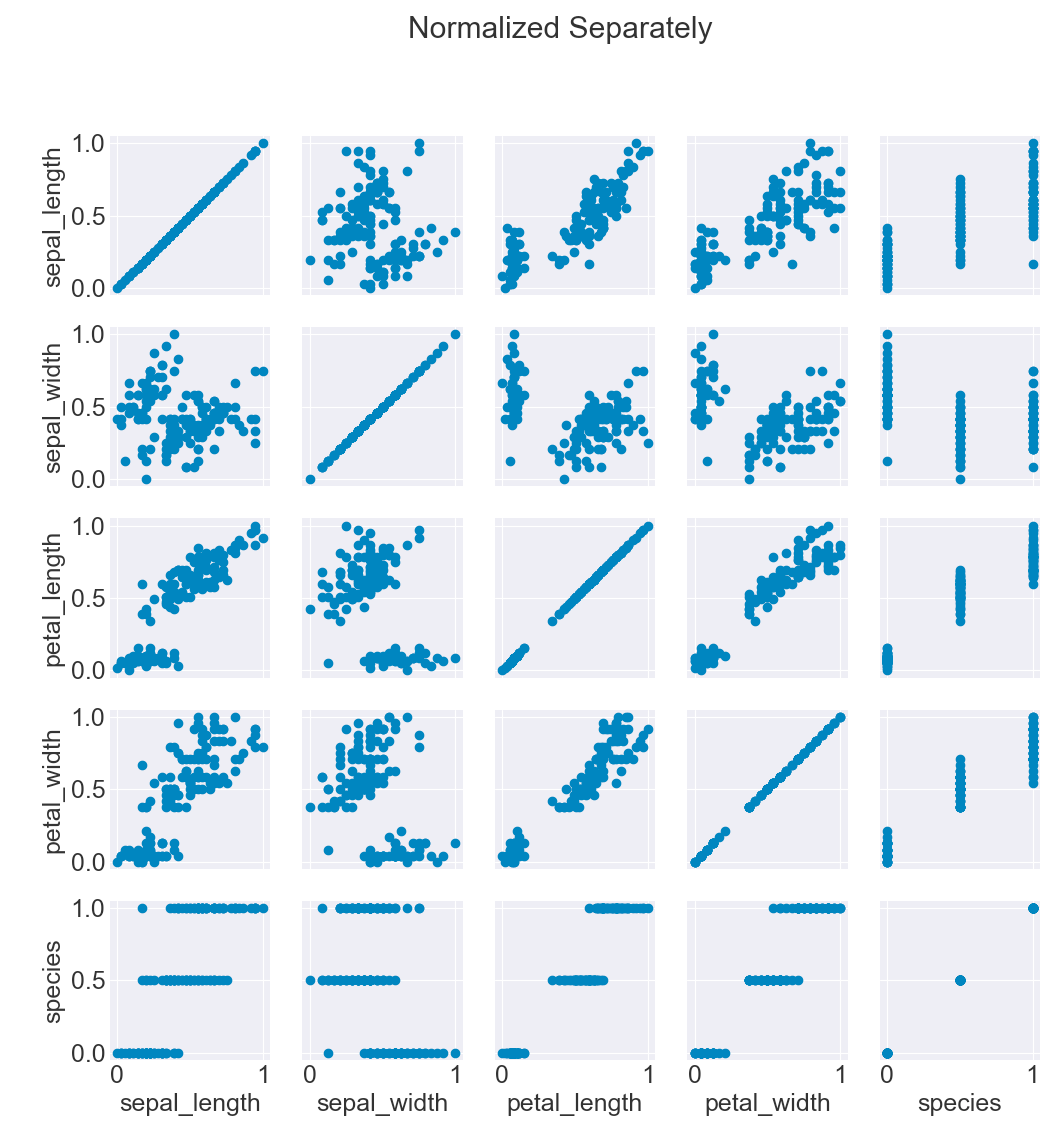

**Question 6:** What type(s) of transformation does normalization require, and in words, what is the meaning of the transformation matrix parameter values used?

**Answer 6:** Requires both translation and scaling. It makes the minimum to 0 and maximum to 1. All other values are translated and scaled to fit into the range of 0 and 1. 

## Task 5) Mystery Letter Dataset

In this task your goal is to find the 3 capital letters hidden in a dataset with 3 variables (3D data). You will begin by implementating methods to create rotation matrices and apply rotation. This operation will play an important role in discovering and transforming the data to uncover these letters.

### Task 5a) Rotation matrices

Implement the following methods then fill in the cells below to test your code.

- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test (i): `rotation_matrix_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [49]:
# Your test code here

t1 = transformation.Transformation(d1)
headers = ['sepal_length', 'sepal_width', 'petal_length']

t1.rotation_matrix_3d('petal_length',45)


array([[ 0.70711, -0.70711,  0.     ,  0.     ],
       [ 0.70711,  0.70711,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  1.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  1.     ]])

**Your output should look like:**

    Rotation matrix:
    [[ 0.70711 -0.70711  0.       0.     ]
     [ 0.70711  0.70711  0.       0.     ]
     [ 0.       0.       1.       0.     ]
     [ 0.       0.       0.       1.     ]]

#### Test (ii): `rotate_3d`

- Using the same Transformation object created in the previous test, rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [50]:
# Your test code here
headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_object = transformation.Transformation(d1)
iris_object.project(headers)
r = iris_object.rotate_3d('sepal_length',10)
print(r[:5,:])

[[5.1     3.20372 1.9865 ]
 [4.9     2.71132 1.89968]
 [4.7     2.92564 1.83592]
 [4.6     2.79243 2.01552]
 [5.      3.3022  2.00386]]


**Your rotation output should look like:**

    [[5.1     3.20372 1.9865 ]
     [4.9     2.71132 1.89968]
     [4.7     2.92564 1.83592]
     [4.6     2.79243 2.01552]
     [5.      3.3022  2.00386]]

### Task 5b)  Mystery Letter Dataset

Your goal is to find the 3 capital letters hidden in `letter_data.csv` with 3 variables (3D data) and create single scatter plots showing each individual letter plotted right-side up. 
- Create Data and Transformation objects for the Letters dataset (`letter_data.csv`).
- Normalize the data seperately then apply transformations to find the hidden letters (scaling, translating and/or rotation).

**Hints:**
- Remember: Applying transformations changes the data stored in the `Transformation` object (i.e. the effects on the data compound). After searching for and identifying one letter, it might be helpful to start with the original data again. This can be achieved by re-projecting and normalizing.
- Visualize the data using `pair_plot` and/or `scatter` after applying a transformation.
- Downloading and running `scatter3d.py` from Terminal will produce an interactive 3D scatterplot. Feel free to use this tool to explore the data and inform your decisions about which transformations to use.

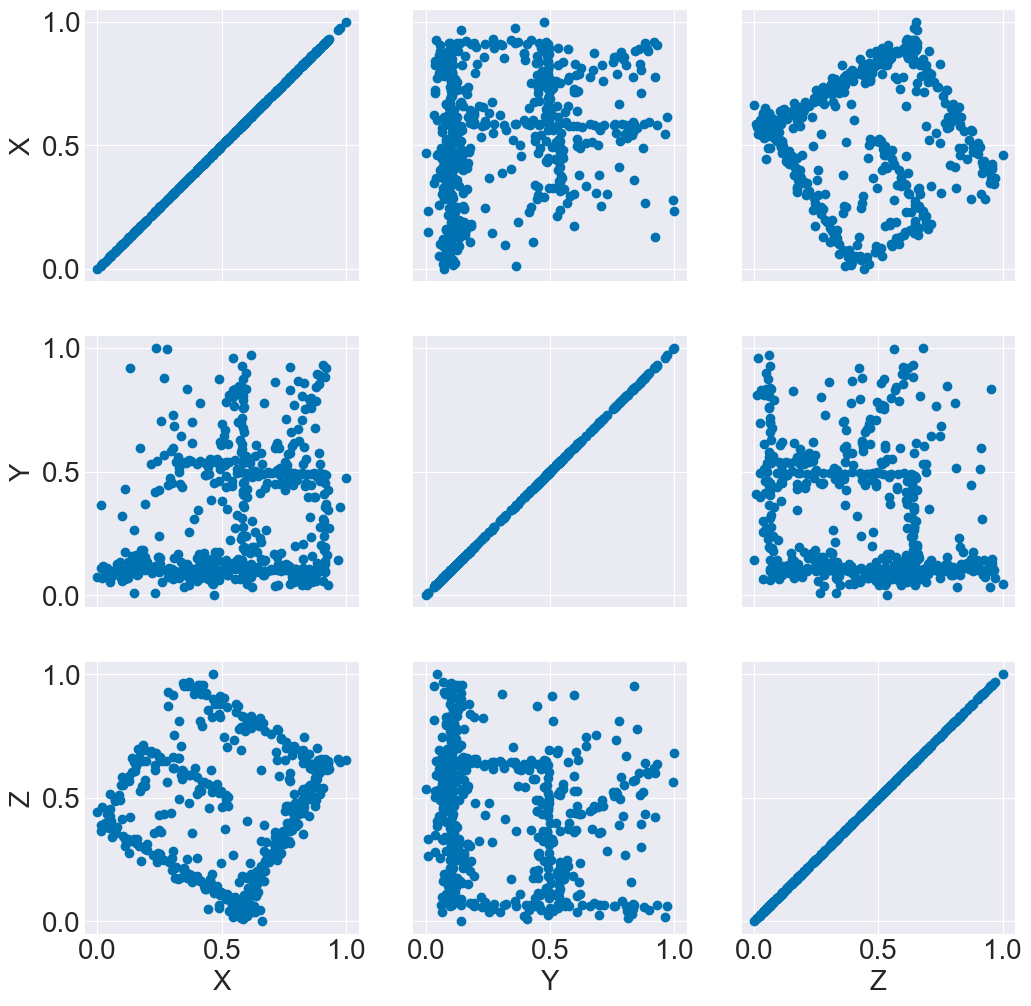

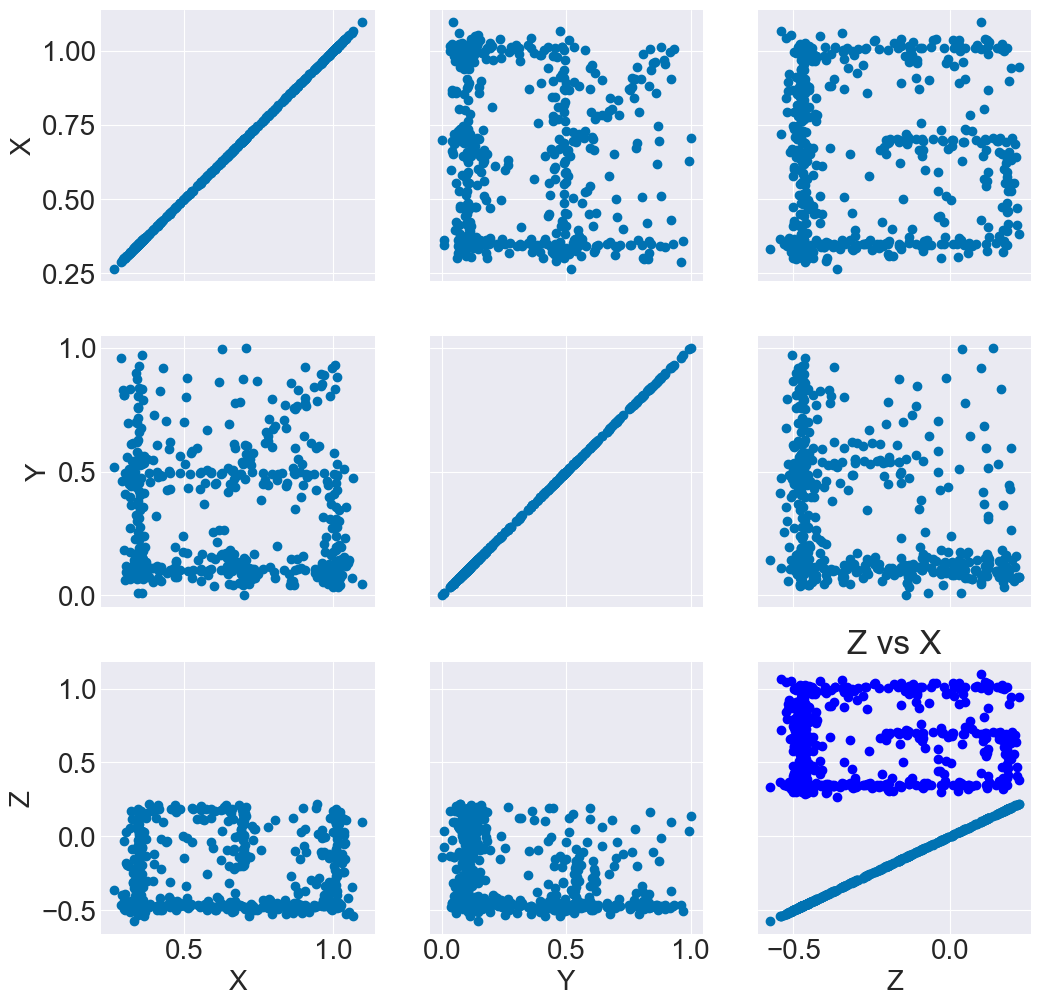

In [51]:
# Your code here

d1 = data.Data('data/letter_data.csv')
t = transformation.Transformation(d1)

t.normalize_separately()

t.pair_plot(['X','Y','Z'])
t.rotate_3d('Y',60)

t.pair_plot(['X','Y','Z'])


g = t.scatter('Z','X', "Z vs X")

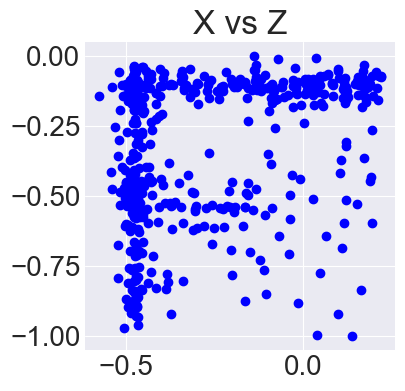

In [52]:
d1 = data.Data('data/letter_data.csv')
t = transformation.Transformation(d1)

t.normalize_separately()

t.rotate_3d('X',270)
t.rotate_3d('Z',210)

g = t.scatter('X','Z', "X vs Z")

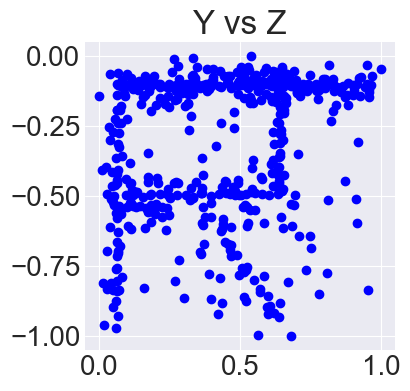

In [53]:
d1 = data.Data('data/letter_data.csv')
t = transformation.Transformation(d1)

t.normalize_separately()

t.rotate_3d('X',270)

g = t.scatter('Y','Z', "Y vs Z")

**Question 7:** Which letters did you find?  How could you tell what type(s) of transformations needed to be performed to find the letters?

**Answer 7:** I found "G", by rotating 60 degrees on Y. I could tell because I want X and Z to change while making Y constant in order to switch the image to the right orientation. 

G - Rotation

F - Rotation rotate on X for 270 degrees then rotate on Z for 210 degrees

R - Rotation on X for 270 degrees



## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Explore additional visualizations

- Implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data (up to 4D).
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

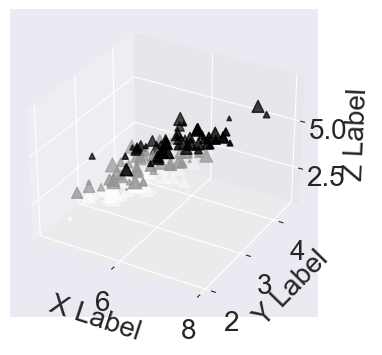

In [54]:
from mpl_toolkits.mplot3d import Axes3D

a = np.genfromtxt('data/iris.csv', delimiter=',')

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = a[:,0]
ys = a[:,1]
zs = a[:,2]
s = randrange(a.shape[0], 0, 100)
c = a[:,4]


m = '^'
ax.scatter(xs, ys, zs, c=c, marker=m, s = s)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

I implemented a scatter plot that uses colour to visualise the fourth dimension, and a random number that represents the size of the data point to be the fifth dimension. I could also use marker to change the aesthetics of the visualisation. 

### 2. Perform different matrix transformations on data

- Normalize by Z-score rather than min/max.
- "Whiten" a dataset.
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

Normalize by Z-score

In [55]:
import time
d1 = data.Data('data/iris.csv')
t = transformation.Transformation(d1)
headers = ['sepal_length','sepal_width','petal_length',"petal_width","species"]
t.project(headers)
t.z_score()

array([[ 1.03585,  0.25716, -0.76486, -1.34888, -1.44621],
       [ 0.93851,  0.01382, -0.76486, -1.34888, -1.44621],
       [ 0.84117,  0.11116, -0.81353, -1.34888, -1.44621],
       [ 0.79251,  0.06249, -0.7162 , -1.34888, -1.44621],
       [ 0.98718,  0.30583, -0.76486, -1.34888, -1.44621],
       [ 1.18185,  0.45183, -0.61886, -1.25154, -1.44621],
       [ 0.79251,  0.20849, -0.76486, -1.30021, -1.44621],
       [ 0.98718,  0.20849, -0.7162 , -1.34888, -1.44621],
       [ 0.69517, -0.03485, -0.76486, -1.34888, -1.44621],
       [ 0.93851,  0.06249, -0.7162 , -1.39755, -1.44621],
       [ 1.18185,  0.3545 , -0.7162 , -1.34888, -1.44621],
       [ 0.88984,  0.20849, -0.66753, -1.34888, -1.44621],
       [ 0.88984,  0.01382, -0.76486, -1.39755, -1.44621],
       [ 0.6465 ,  0.01382, -0.91087, -1.39755, -1.44621],
       [ 1.37652,  0.5005 , -0.8622 , -1.34888, -1.44621],
       [ 1.32785,  0.69517, -0.7162 , -1.25154, -1.44621],
       [ 1.18185,  0.45183, -0.81353, -1.25154, -1.44621

Calculates Z score by scipy function

In [56]:
d1 = data.Data('data/iris.csv')
t = transformation.Transformation(d1)
headers = ['sepal_length','sepal_width','petal_length',"petal_width","species"]
t.project(headers)
t.z_score_scipy()

array([[-0.90068,  1.019  , -1.34023, -1.31544, -1.22474],
       [-1.14302, -0.13198, -1.34023, -1.31544, -1.22474],
       [-1.38535,  0.32841, -1.39706, -1.31544, -1.22474],
       [-1.50652,  0.09822, -1.28339, -1.31544, -1.22474],
       [-1.02185,  1.2492 , -1.34023, -1.31544, -1.22474],
       [-0.53718,  1.93979, -1.16971, -1.05218, -1.22474],
       [-1.50652,  0.78881, -1.34023, -1.18381, -1.22474],
       [-1.02185,  0.78881, -1.28339, -1.31544, -1.22474],
       [-1.74886, -0.36218, -1.34023, -1.31544, -1.22474],
       [-1.14302,  0.09822, -1.28339, -1.44708, -1.22474],
       [-0.53718,  1.4794 , -1.28339, -1.31544, -1.22474],
       [-1.26418,  0.78881, -1.22655, -1.31544, -1.22474],
       [-1.26418, -0.13198, -1.34023, -1.44708, -1.22474],
       [-1.87002, -0.13198, -1.51074, -1.44708, -1.22474],
       [-0.05251,  2.16999, -1.4539 , -1.31544, -1.22474],
       [-0.17367,  3.09078, -1.28339, -1.05218, -1.22474],
       [-0.53718,  1.93979, -1.39706, -1.05218, -1.22474

In the transformation.py file, I implemeted different methods to compare the computation speed of broadcasting versus vector. 

In [57]:
t5 = transformation.Transformation(d1)
headers = ['sepal_length','sepal_width','petal_length',"petal_width","species"]
t5.project(headers)


start = time.time()
for i in range(1000):
    t5.normalize_together()
end = time.time()
result = end-start
print("normalize_together_vector result: ",result)

normalize_together_vector result:  0.020863056182861328


In [58]:
t5 = transformation.Transformation(d1)
headers = ['sepal_length','sepal_width','petal_length',"petal_width","species"]
t5.project(headers)


start = time.time()
for i in range(1000):
    t5.normalize_broadcast()
end = time.time()
result = end-start
print("normalize_together_broadcast result: ",result)

normalize_together_broadcast result:  0.007445812225341797


In [59]:
t6 = transformation.Transformation(d1)
headers = ['sepal_length','sepal_width','petal_length',"petal_width","species"]
t6.project(headers)

start = time.time()
for i in range(1000):
    t6.normalize_separately()
end = time.time()
result = end-start
print("normalize_separately_vector result: ",result)

normalize_separately_vector result:  0.02579522132873535


In [60]:
t7 = transformation.Transformation(d1)
headers = ['sepal_length','sepal_width','petal_length',"petal_width","species"]
t7.project(headers)

start = time.time()
for i in range(1000):
    t7.normalize_separately_broadcast()
end = time.time()
result = end-start
print("normalize_separately_broadcast result: ",result)

normalize_separately_broadcast result:  0.009895086288452148


In Conclusion, The run time for broadcasting is faster than vectorization

### 3. Implement and use 2D rotation

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[[-3.5  5.1]
 [-3.   4.9]
 [-3.2  4.7]
 [-3.1  4.6]
 [-3.6  5. ]]


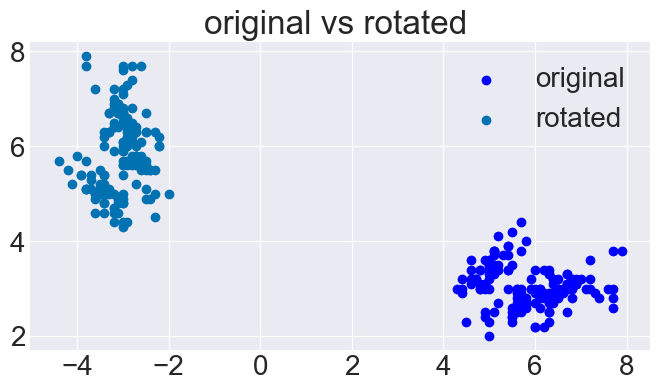

In [61]:
plt.figure(figsize = (8,4))
# plt.ylim(-4,8)
# plt.xlim(-4,8)
headers = ['sepal_length', 'sepal_width']
t8 = transformation.Transformation(d1)
t8.project(headers)
t8.scatter('sepal_length','sepal_width', "original vs rotated ",legend = True, label = "original")

print(t8.data.data[:5,:])
r = t8.rotate_2d(90)
print(r[:5,:])

plt.scatter(r[:,0],r[:,1], label = 'rotated')
plt.legend()


I implemented another method to do 2D transformation

### 4. Apply matrix transformations and visualization a dataset of your choice

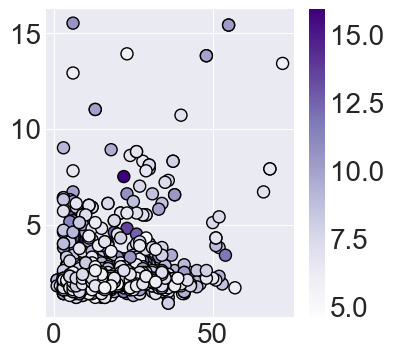

(<Figure size 1200x1200 with 144 Axes>,
 array([[<AxesSubplot:ylabel='fixed acidity'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='volatile acidity'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='citric acid'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='residual sugar'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot

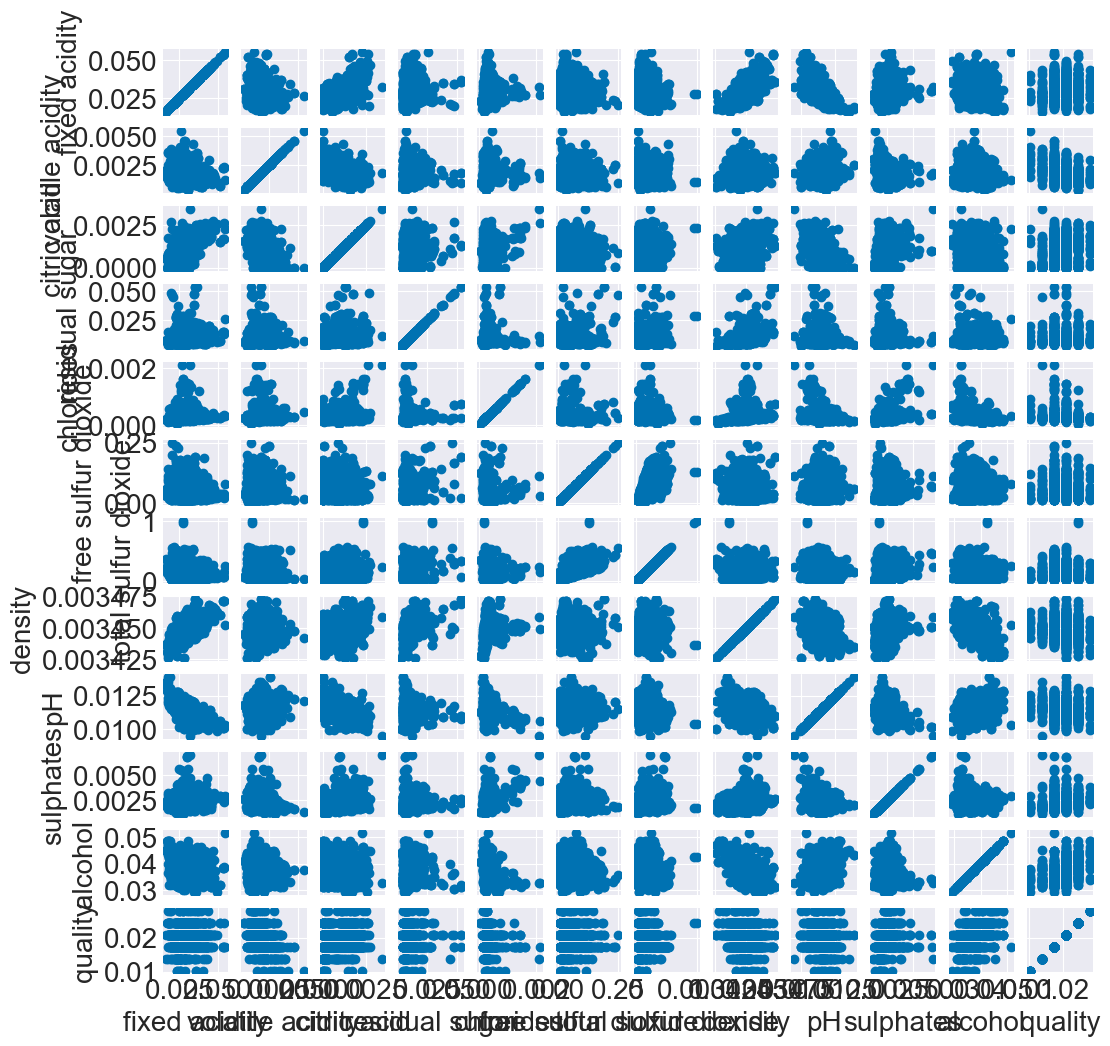

In [62]:
winedata = data.Data('data/winequality-red.csv')
wine_t = transformation.Transformation(winedata)
wine_headers = winedata.get_headers()


wine_t.scatter_color('free sulfur dioxide', 'residual sugar', 'fixed acidity')

wine_t.normalize_together()
wine_t.pair_plot(wine_headers)

I first normalized the wine quality dataset and pair plotted to find if there are any trends between the variables. Althogh it is kind of small, I immediately noticed that some variables are not suitable for scatter. For example, the bottom row and the right-most column. 

Quality for example, has discrete numbers that changes within the range of 5-7. Therefore, perhaps, it would be benefitial to change it to a histogram and put similar values of its dependent variable in 3 bins. 

The diagonal variables are plotted against itself, so it is represented by a straight line. It would be benefitial to change that into a histogram, calculating the number of datapoints that fall within a certain range. 